In [2]:
# Import the google drive folders that contain the data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/DSC680/Weeks5-8/Week8/datasets/

/content/drive/MyDrive/DSC680/Weeks5-8/Week8/datasets


In [4]:
%ls

meets.csv             openpowerlifting_full-cleaned.csv  pml-training_full.csv
megaGymDataset.csv    openpowerlifting_short.csv
openpowerlifting.csv  pml-testing.csv


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df1 = pd.read_csv('./meets.csv')
df1.head()

,MeetID,MeetPath,Federation,Date,MeetCountry,MeetState,MeetTown,MeetName
0,0,365strong/1601,365Strong,2016-10-29,USA,NC,Charlotte,2016 Junior & Senior National Powerlifting Cha...
1,1,365strong/1602,365Strong,2016-11-19,USA,MO,Ozark,Thanksgiving Powerlifting Classic
2,2,365strong/1603,365Strong,2016-07-09,USA,NC,Charlotte,Charlotte Europa Games
3,3,365strong/1604,365Strong,2016-06-11,USA,SC,Rock Hill,Carolina Cup Push Pull Challenge
4,4,365strong/1605,365Strong,2016-04-10,USA,SC,Rock Hill,Eastern USA Challenge


In [7]:
df1.describe()

,MeetID
count,8482.000000
mean,4240.500000
std,2448.686825
min,0.000000
25%,2120.250000
50%,4240.500000
75%,6360.750000
max,8481.000000


In [8]:
df1['Date'] = pd.to_datetime(df1['Date'])
df1['Month'] = df1['Date'].apply(lambda x:x.month)
df1['Year'] = df1['Date'].apply(lambda x:x.year)

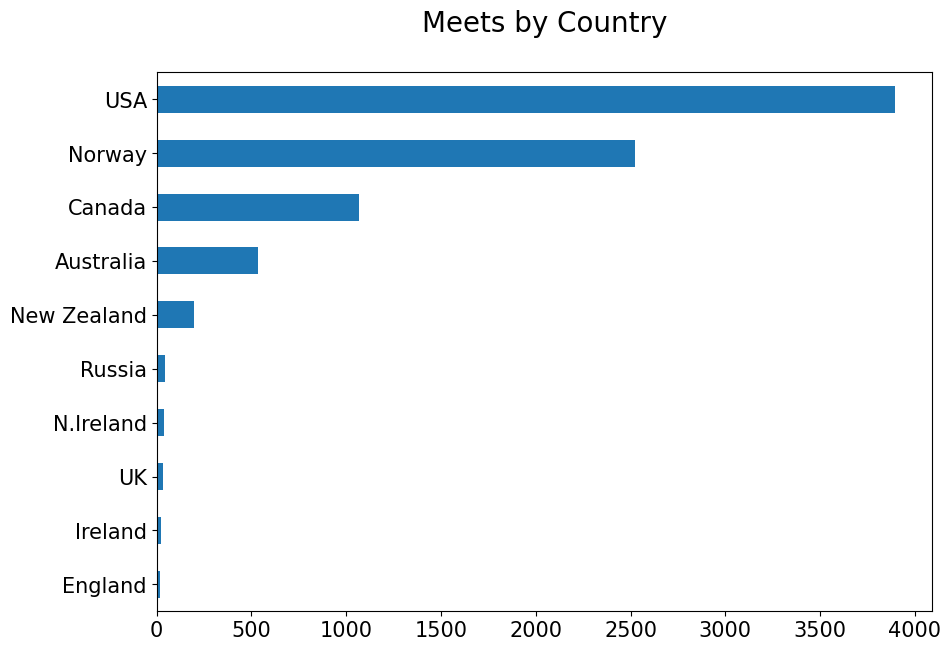

Meets by Country:

USA            3894
Norway         2521
Canada         1066
Australia       532
New Zealand     195
Russia           43
N.Ireland        36
UK               34
Ireland          21
England          16
Name: MeetCountry, dtype: int64


In [9]:
plt.figure(figsize=(10,7))
df1['MeetCountry'].value_counts()[:10].sort_values(ascending=True).plot(kind='barh')
plt.title('Meets by Country\n',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()
print('Meets by Country:\n')
print(df1['MeetCountry'].value_counts()[:10])

In [10]:
#Current country populations, as of April 12, 2018

usPop = 325700000
norwayPop = 5230000
canadaPop = 36290000
aussiePop = 24130000
kiwiPop = 4690000


perCapDict = {'United States': len(df1[df1['MeetCountry']=='USA']) / usPop * 100000,
            'Norway': len(df1[df1['MeetCountry']=='Norway']) / norwayPop * 100000,
            'Canada': len(df1[df1['MeetCountry']=='Canada']) / canadaPop * 100000,
            'Australia': len(df1[df1['MeetCountry']=='Australia']) / aussiePop * 100000,
            'New Zealand': len(df1[df1['MeetCountry']=='New Zealand']) / kiwiPop * 100000}

perCapDf = pd.Series(perCapDict)

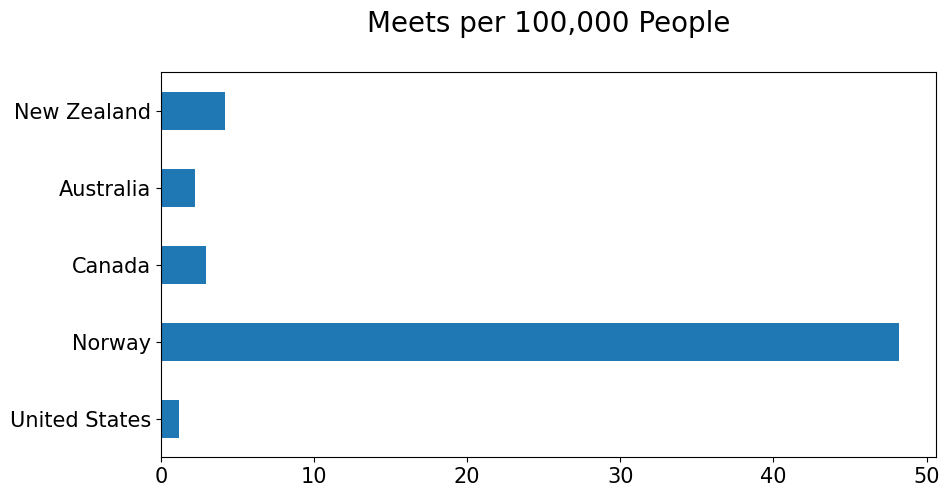

Meets per 100,000 People

United:  1.2
Norway:  48.2
Canada:  2.94
Austra:  2.2
New Ze:  4.16


In [11]:
plt.figure(figsize=(10,5))
perCapDf.plot(kind='barh')
plt.title('Meets per 100,000 People\n',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()
print('Meets per 100,000 People\n')
for k,v in perCapDict.items():
    print(k[:6] + ': ',(round(v,2)))

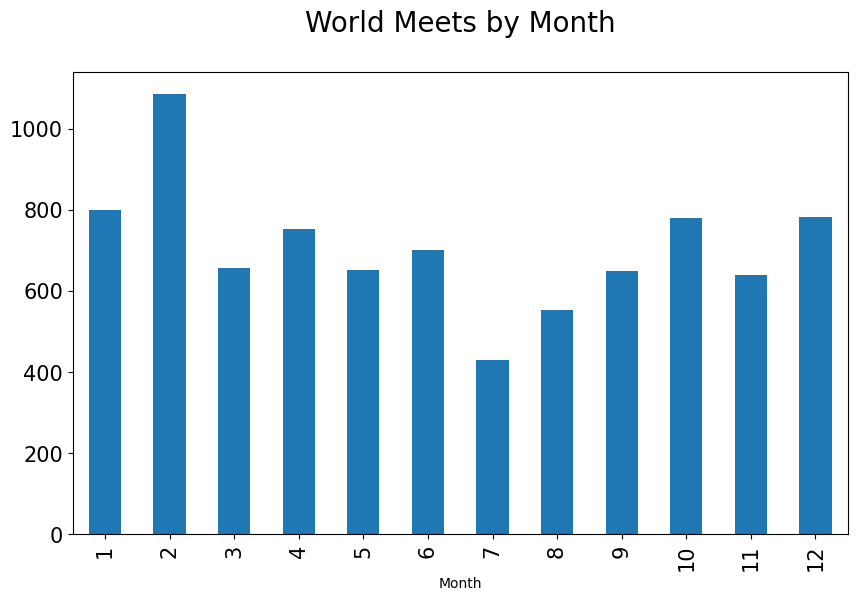

Month
1      800
2     1085
3      656
4      753
5      652
6      702
7      430
8      552
9      650
10     781
11     639
12     782
Name: Month, dtype: int64


In [12]:
plt.figure(figsize=(10,6))
df1.groupby(['Month'])['Month'].count().plot(kind='bar')
plt.title('World Meets by Month\n',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()
print(df1.groupby(['Month'])['Month'].count())

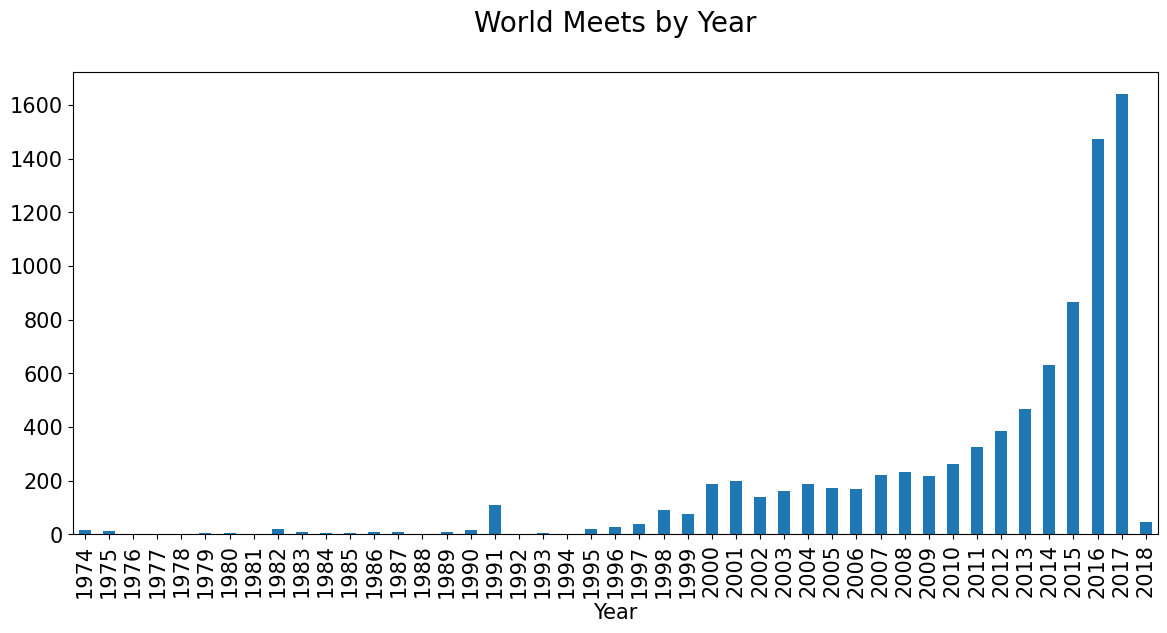

In [13]:
plt.figure(figsize=(14,6))
df1.groupby(['Year'])['Year'].count().plot(kind='bar')
plt.title('World Meets by Year\n',fontsize=20)
plt.xlabel('Year',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [14]:
df = pd.read_csv('./openpowerlifting.csv')

<ipython-input-14-6d0c17c0d39f>:1: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./openpowerlifting.csv')


In [15]:
df.head()

,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,...,McCulloch,Glossbrenner,IPFPoints,Tested,Country,Federation,Date,MeetCountry,MeetState,MeetName
0,Abbie Murphy,F,SBD,Wraps,29.0,24-34,F-OR,59.8,60,80.0,...,324.16,286.42,511.15,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
1,Abbie Tuong,F,SBD,Wraps,29.0,24-34,F-OR,58.5,60,100.0,...,378.07,334.16,595.65,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
2,Ainslee Hooper,F,B,Raw,40.0,40-44,F-OR,55.4,56,NaN,...,38.56,34.12,313.97,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
3,Amy Moldenhauer,F,SBD,Wraps,23.0,20-23,F-OR,60.0,60,-105.0,...,345.61,305.37,547.04,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
4,Andrea Rowan,F,SBD,Wraps,45.0,45-49,F-OR,104.0,110,120.0,...,338.91,274.56,550.08,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup


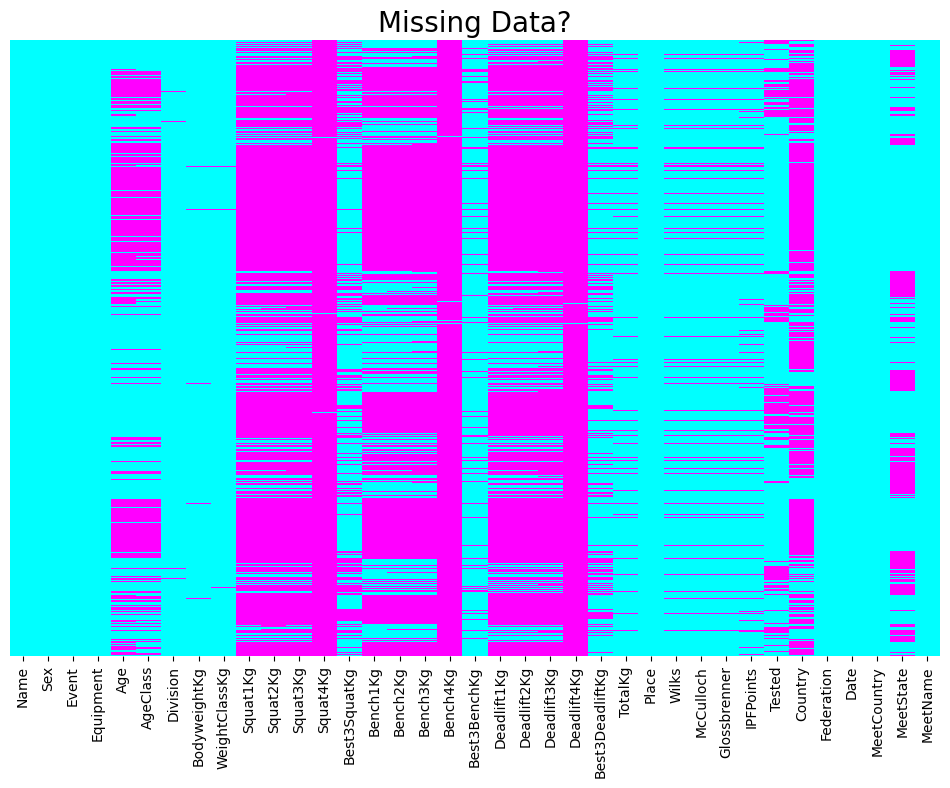

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(),cmap='cool',cbar=False,yticklabels=False)
plt.title('Missing Data?',fontsize=20)
plt.show()

In [17]:
df.drop(['Squat4Kg','Bench4Kg','Deadlift4Kg'],axis=1,inplace=True)

In [18]:
df.head()

,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,...,McCulloch,Glossbrenner,IPFPoints,Tested,Country,Federation,Date,MeetCountry,MeetState,MeetName
0,Abbie Murphy,F,SBD,Wraps,29.0,24-34,F-OR,59.8,60,80.0,...,324.16,286.42,511.15,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
1,Abbie Tuong,F,SBD,Wraps,29.0,24-34,F-OR,58.5,60,100.0,...,378.07,334.16,595.65,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
2,Ainslee Hooper,F,B,Raw,40.0,40-44,F-OR,55.4,56,NaN,...,38.56,34.12,313.97,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
3,Amy Moldenhauer,F,SBD,Wraps,23.0,20-23,F-OR,60.0,60,-105.0,...,345.61,305.37,547.04,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
4,Andrea Rowan,F,SBD,Wraps,45.0,45-49,F-OR,104.0,110,120.0,...,338.91,274.56,550.08,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup


In [19]:
df['Name'].value_counts()[:10]

Alan Aerts         214
Jose Hernandez     204
Sverre Paulsen     191
Erik Rasmussen     186
Bonnie Aerts       165
Zbyněk Krejča      154
Bjørn Grønvold     154
Jackie Blasbery    150
Max Bristow        147
Hana Takáčová      145
Name: Name, dtype: int64

In [20]:
print('Number of unique divisions: ' + str(df['Division'].nunique()))

Number of unique divisions: 4842


In [21]:
def age_class(x):
    if x < 13:
        return 'CHILD'
    if x >= 13 and x <= 17:
        return 'YOUTH'
    if x >= 18 and x <= 34:
        return 'ADULT'
    if x >= 35:
        return 'MASTERS'

In [22]:
df['AgeClass'] = df['Age'].apply(age_class)

In [28]:
def squatBody(x):
    return x['Best3SquatKg'] / x['BodyweightKg']

def benchBody(x):
    return x['Best3BenchKg'] / x['BodyweightKg']

def deadliftBody(x):
    return x['Best3DeadliftKg'] / x['BodyweightKg']

def totalLiftBody(x):
    return x['TotalKg'] / x['BodyweightKg']



In [29]:
df['Squat / BW'] = df.apply(squatBody,axis=1)
df['Bench / BW'] = df.apply(benchBody,axis=1)
df['Deadlift / BW'] = df.apply(deadliftBody,axis=1)
df['Total / BW'] = df.apply(totalLiftBody,axis=1)

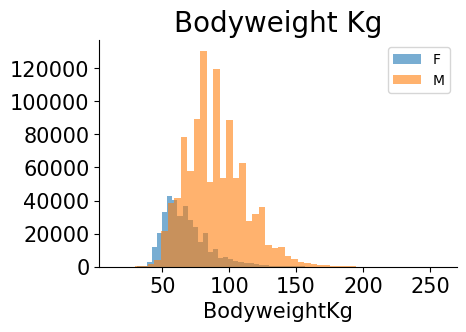

In [31]:
g = sns.FacetGrid(df,hue='Sex',aspect=1.5,legend_out=True)
g = g.map(plt.hist,'BodyweightKg',bins=50,alpha=.6)
plt.title('Bodyweight Kg',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('BodyweightKg',fontsize=15)
plt.legend(loc=1)
plt.show()


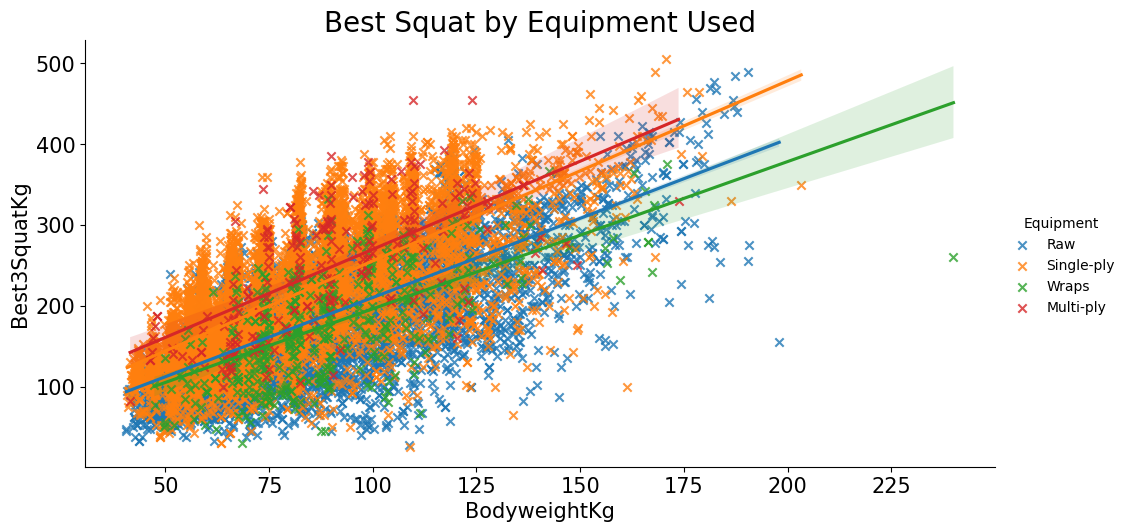

Equipment Used by Lifters:

Single-ply    787141
Raw           467421
Wraps         103739
Multi-ply      65035
Straps            18
Name: Equipment, dtype: int64


In [34]:
sns.lmplot(x='BodyweightKg',
           y='Best3SquatKg',
           data=df.dropna(),
           hue='Equipment',
           markers='x',
           aspect=2)
plt.title('Best Squat by Equipment Used',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Best3SquatKg',fontsize=15)
plt.xlabel('BodyweightKg',fontsize=15)
plt.show()
print('Equipment Used by Lifters:\n')
print(df['Equipment'].dropna().value_counts())

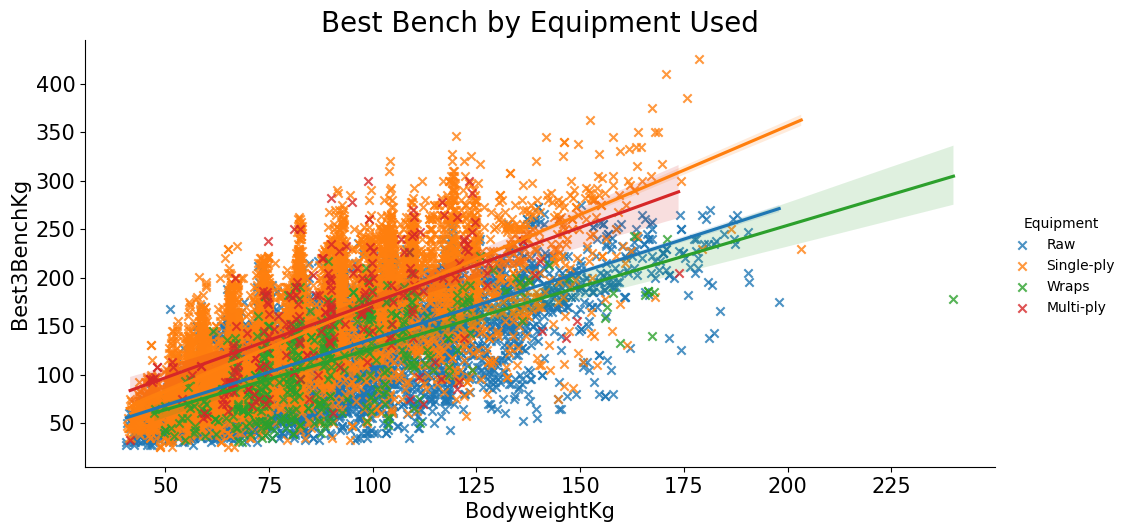

Equipment Used by Lifters:

Single-ply    787141
Raw           467421
Wraps         103739
Multi-ply      65035
Straps            18
Name: Equipment, dtype: int64


In [35]:
sns.lmplot(x='BodyweightKg',
           y='Best3BenchKg',
           data=df.dropna(),
           hue='Equipment',
           markers='x',
           aspect=2)
plt.title('Best Bench by Equipment Used',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Best3BenchKg',fontsize=15)
plt.xlabel('BodyweightKg',fontsize=15)
plt.show()
print('Equipment Used by Lifters:\n')
print(df['Equipment'].dropna().value_counts())

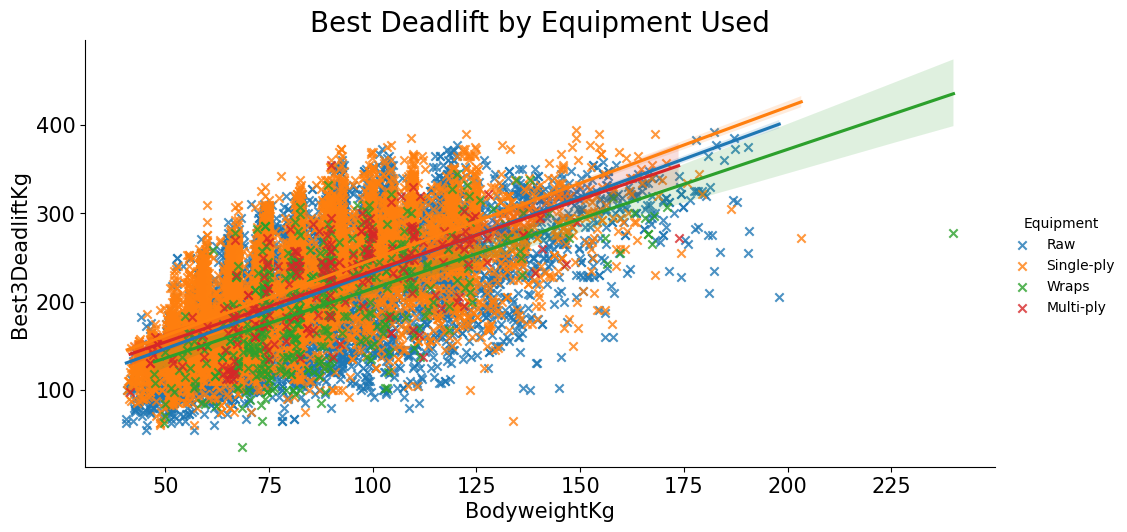

Equipment Used by Lifters:

Single-ply    787141
Raw           467421
Wraps         103739
Multi-ply      65035
Straps            18
Name: Equipment, dtype: int64


In [37]:
sns.lmplot(x='BodyweightKg',
           y='Best3DeadliftKg',
           data=df.dropna(),
           hue='Equipment',
           markers='x',
           aspect=2)
plt.title('Best Deadlift by Equipment Used',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Best3DeadliftKg',fontsize=15)
plt.xlabel('BodyweightKg',fontsize=15)
plt.show()
print('Equipment Used by Lifters:\n')
print(df['Equipment'].dropna().value_counts())

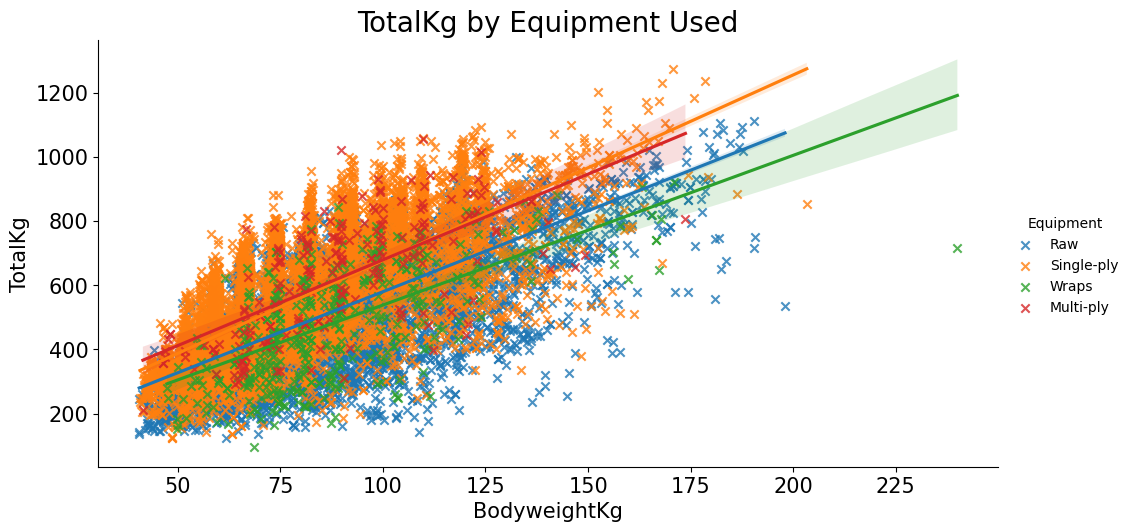

Equipment Used by Lifters:

Single-ply    787141
Raw           467421
Wraps         103739
Multi-ply      65035
Straps            18
Name: Equipment, dtype: int64


In [38]:
sns.lmplot(x='BodyweightKg',
           y='TotalKg',
           data=df.dropna(),
           hue='Equipment',
           markers='x',
           aspect=2)
plt.title('TotalKg by Equipment Used',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('TotalKg',fontsize=15)
plt.xlabel('BodyweightKg',fontsize=15)
plt.show()
print('Equipment Used by Lifters:\n')
print(df['Equipment'].dropna().value_counts())

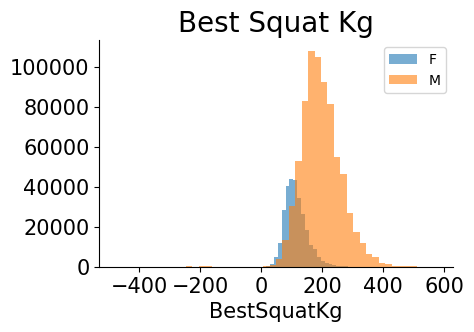

In [40]:
g = sns.FacetGrid(df,hue='Sex',aspect=1.5,legend_out=True)
g = g.map(plt.hist,'Best3SquatKg',bins=50,alpha=.6)
plt.title('Best Squat Kg',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('BestSquatKg',fontsize=15)
plt.legend(loc=1)
plt.show()

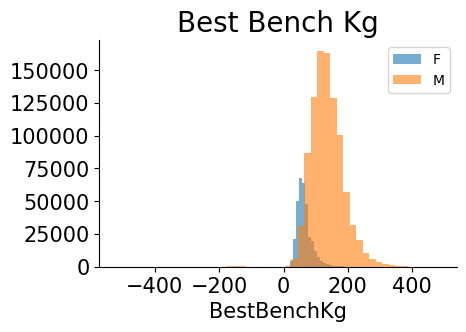

In [42]:
g = sns.FacetGrid(df,hue='Sex',aspect=1.5,legend_out=True)
g = g.map(plt.hist,'Best3BenchKg',bins=50,alpha=.6)
plt.title('Best Bench Kg',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('BestBenchKg',fontsize=15)
plt.legend(loc=1)
plt.show()


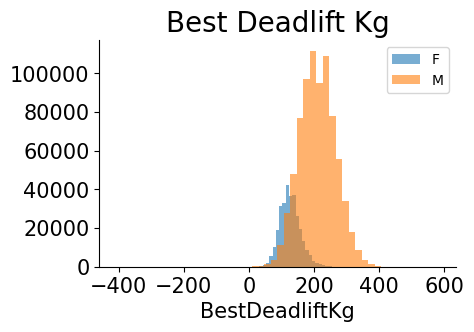

In [43]:
g = sns.FacetGrid(df,hue='Sex',aspect=1.5,legend_out=True)
g = g.map(plt.hist,'Best3DeadliftKg',bins=50,alpha=.6)
plt.title('Best Deadlift Kg',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('BestDeadliftKg',fontsize=15)
plt.legend(loc=1)
plt.show()

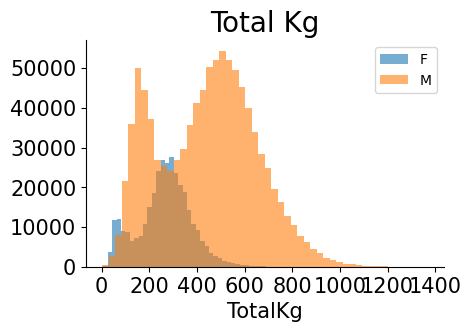

In [44]:
g = sns.FacetGrid(df,hue='Sex',aspect=1.5,legend_out=True)
g = g.map(plt.hist,'TotalKg',bins=50,alpha=.6)
plt.title('Total Kg',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('TotalKg',fontsize=15)
plt.legend(loc=1)
plt.show()

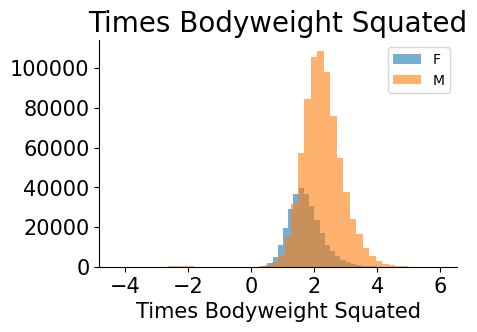

In [46]:
g = sns.FacetGrid(df,hue='Sex',aspect=1.5,legend_out=True)
g = g.map(plt.hist,'Squat / BW',bins=50,alpha=.6)
plt.title('Times Bodyweight Squated',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Times Bodyweight Squated',fontsize=15)
plt.legend(loc=1)
plt.show()

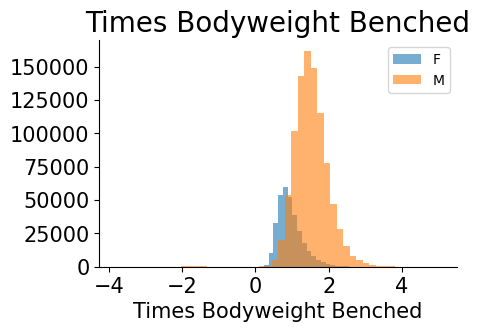

In [47]:
g = sns.FacetGrid(df,hue='Sex',aspect=1.5,legend_out=True)
g = g.map(plt.hist,'Bench / BW',bins=50,alpha=.6)
plt.title('Times Bodyweight Benched',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Times Bodyweight Benched',fontsize=15)
plt.legend(loc=1)
plt.show()

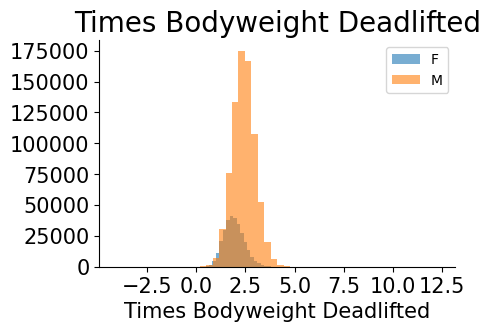

In [48]:
g = sns.FacetGrid(df,hue='Sex',aspect=1.5,legend_out=True)
g = g.map(plt.hist,'Deadlift / BW',bins=50,alpha=.6)
plt.title('Times Bodyweight Deadlifted',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Times Bodyweight Deadlifted',fontsize=15)
plt.legend(loc=1)
plt.show()

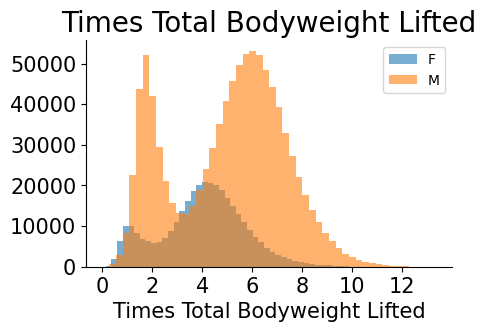

In [49]:
g = sns.FacetGrid(df,hue='Sex',aspect=1.5,legend_out=True)
g = g.map(plt.hist,'Total / BW',bins=50,alpha=.6)
plt.title('Times Total Bodyweight Lifted',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Times Total Bodyweight Lifted',fontsize=15)
plt.legend(loc=1)
plt.show()


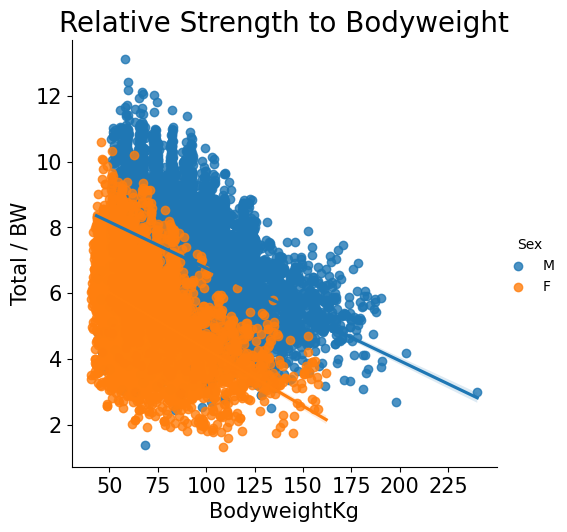

In [51]:
sns.lmplot(data=df.dropna(),
           x='BodyweightKg',
           y='Total / BW',
           hue='Sex')
plt.title('Relative Strength to Bodyweight',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Total / BW',fontsize=15)
plt.xlabel('BodyweightKg',fontsize=15)
plt.show()

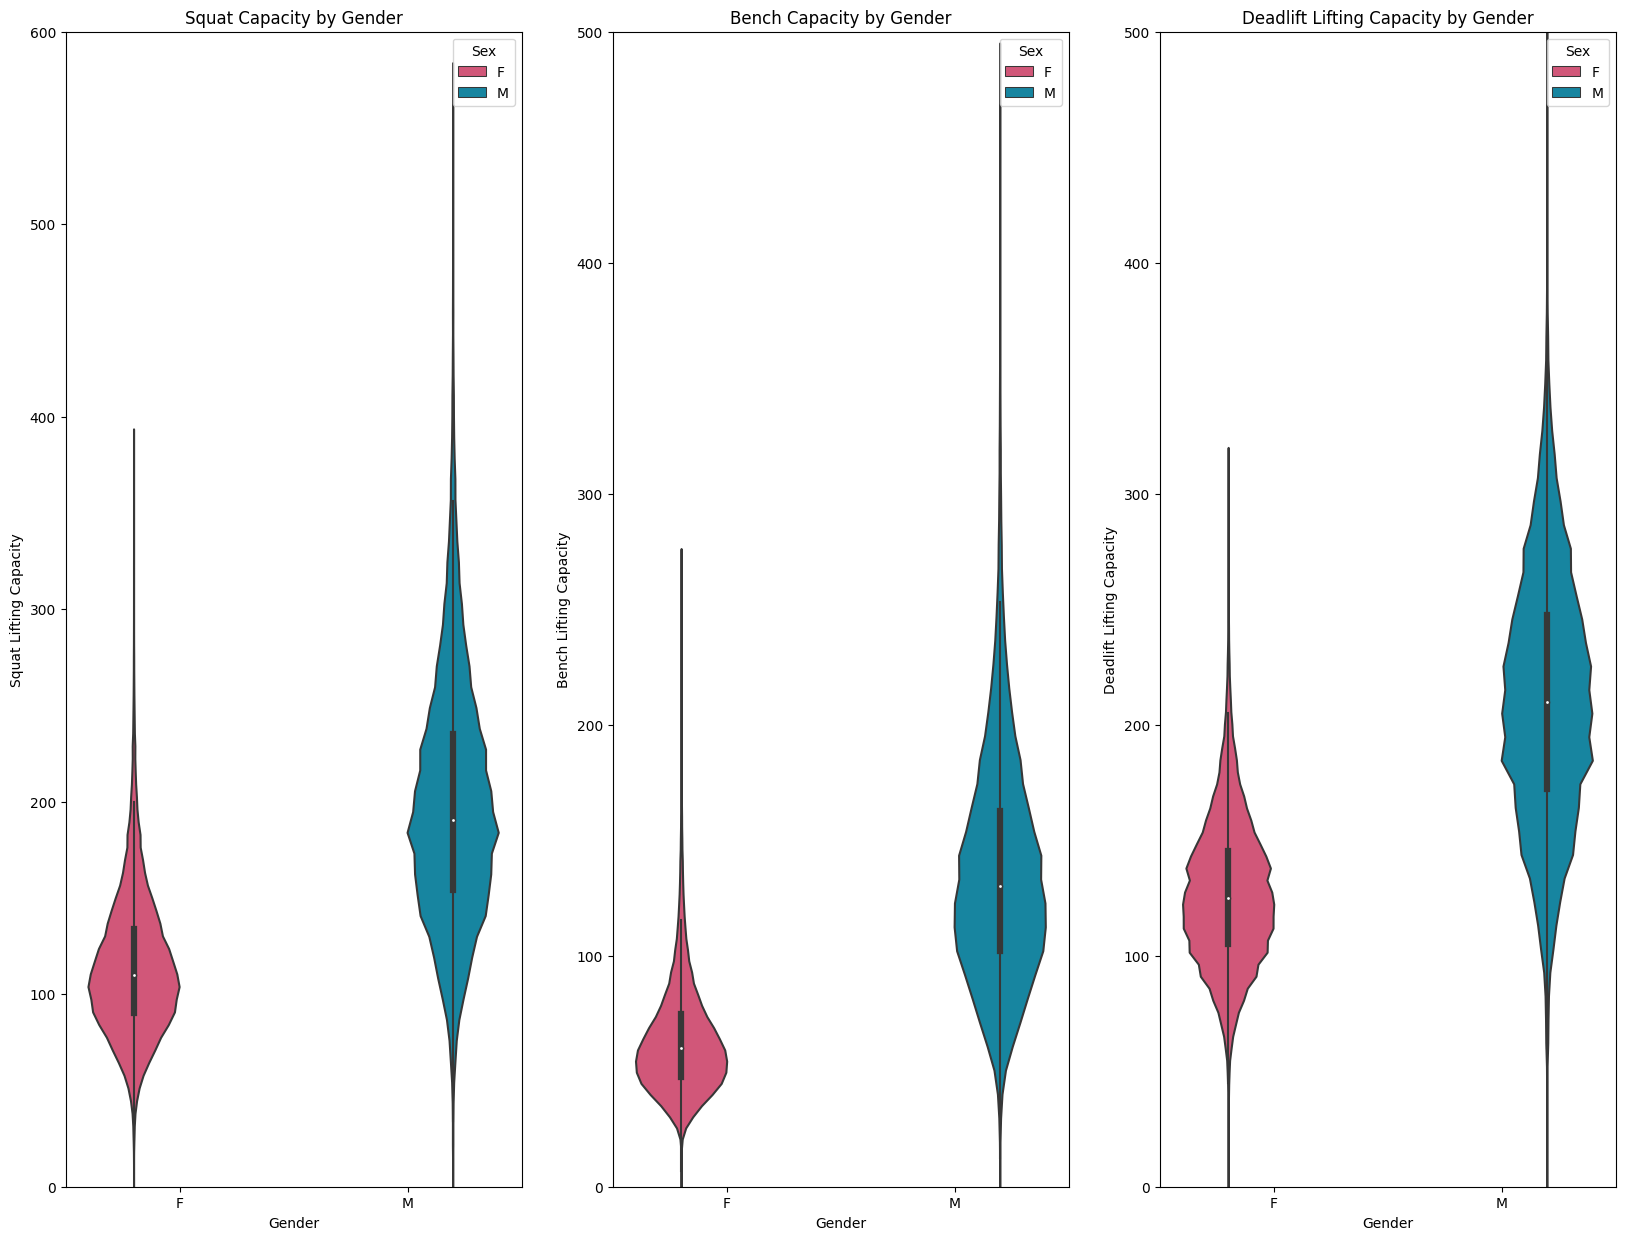

In [52]:
import seaborn as sns
plt.figure(figsize = (20,15))

plt.subplot(1,3,1)

plt.ylim(0,600)
sns.violinplot(data = df, x = 'Sex', y = 'Best3SquatKg',hue = 'Sex', scale = 'count',dodge = True, palette = ['#e54370','#0093b7'])
plt.style.use("fast")
plt.title('Squat Capacity by Gender')
plt.xlabel('Gender')
plt.ylabel('Squat Lifting Capacity')


plt.subplot(1,3,2)
plt.ylim(0,500)
plt.style.use("fast")
sns.violinplot(data = df, x = 'Sex', y = 'Best3BenchKg',hue = 'Sex',scale = 'count',dodge = True, palette = ['#e54370','#0093b7'])
plt.xlabel('Gender')
plt.ylabel('Bench Lifting Capacity')
plt.title('Bench Capacity by Gender')


plt.subplot(1,3,3)
plt.ylim(0,500)
plt.style.use("fast")
sns.violinplot(data = df, x = 'Sex', y = 'Best3DeadliftKg',hue = 'Sex',scale = 'count',dodge = True, palette = ['#e54370','#0093b7'])
plt.xlabel('Gender')
plt.ylabel('Deadlift Lifting Capacity')
plt.title('Deadlift Lifting Capacity by Gender')


plt.show()

In [53]:
df.shape

(1423354, 38)

In [54]:
df.dtypes

Name                object
Sex                 object
Event               object
Equipment           object
Age                float64
AgeClass            object
Division            object
BodyweightKg       float64
WeightClassKg       object
Squat1Kg           float64
Squat2Kg           float64
Squat3Kg           float64
Best3SquatKg       float64
Bench1Kg           float64
Bench2Kg           float64
Bench3Kg           float64
Best3BenchKg       float64
Deadlift1Kg        float64
Deadlift2Kg        float64
Deadlift3Kg        float64
Best3DeadliftKg    float64
TotalKg            float64
Place               object
Wilks              float64
McCulloch          float64
Glossbrenner       float64
IPFPoints          float64
Tested              object
Country             object
Federation          object
Date                object
MeetCountry         object
MeetState           object
MeetName            object
Squat / BW         float64
Bench / BW         float64
Deadlift / BW      float64
T

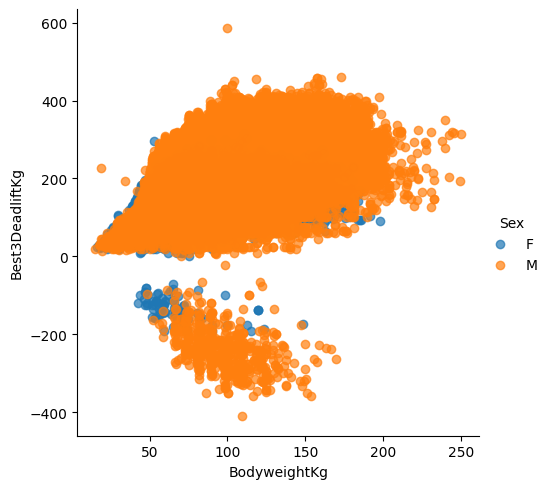

In [55]:
sns.lmplot(y='Best3DeadliftKg', x='BodyweightKg', hue='Sex', 
           data=df, 
           fit_reg=False, scatter_kws={'alpha':0.7})